# EDA for e-commerce dataset
This dataset download from kaggle.


This EDA divied into five part:
1.Context of dataset
2.Data cleaning
3.EDA & Results
4.Conclusion

In [2]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#Importing dataset
dataset = pd.read_csv('data.csv',header=0,encoding = 'unicode_escape')

1. Context of dataset

In [6]:
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
dataset.shape  # Number of rows and columns

(541909, 8)

In [8]:
dataset.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

2. Data cleaning 

In [10]:
#Checking NAN values
dataset.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [11]:
dataset.drop(['CustomerID'],axis=1,inplace=True)

In [13]:
#Removing NAN values row-wise
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [15]:
dataset.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


We can see that minimum value of product's quanlity is negative and it's not possible.

In [16]:
dataset[(dataset['Quantity']<=0) | (dataset['UnitPrice']<0)].count()

InvoiceNo      9764
StockCode      9764
Description    9764
Quantity       9764
InvoiceDate    9764
UnitPrice      9764
Country        9764
dtype: int64

In [21]:
dataset=dataset[dataset['Quantity']>0]
dataset=dataset[dataset['UnitPrice']>=0]

Now check the categorical attributes description

In [22]:
dataset.describe(include=[np.object])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,530691,530691,530691,530691,530691
unique,20134,3925,4077,18639,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2270,2327,1114,485692


Now find out total amount spent on each transcations:
Total amount = quantity * unit price


In [23]:
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


3.EDA & Results

In [25]:
dataset['total_amount'] = dataset['Quantity']*dataset['UnitPrice']

In [26]:
dataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [28]:
from datetime import datetime
def toDtObject(value):
    return datetime.strptime(value,'%m/%d/%Y %H:%M')

In [29]:
#InvoiceDate column is in the string format converting into Datetime object
dataset['InvoiceDate'] = dataset['InvoiceDate'].apply(toDtObject)

In [30]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [33]:
def getMonth(value):
    return int(value.strftime('%m'))
def getDay(value):
    return int(value.strftime('%d'))
def getYear(value):
    return int(value.strftime('%Y'))
def getHour(value):
    return int(value.strftime('%H'))

#seperate month,day and year columns

dataset['month']=dataset['InvoiceDate'].apply(getMonth)
dataset['day']=dataset['InvoiceDate'].apply(getDay)
dataset['year']=dataset['InvoiceDate'].apply(getYear)
dataset['hour']=dataset['InvoiceDate'].apply(getHour)

In [34]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount,month,day,year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12,1,2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,12,1,2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1,2010,8


In [35]:
dataset['year'].value_counts()

2011    489071
2010     41620
Name: year, dtype: int64

In [36]:
dataset.InvoiceDate.describe()

count                  530691
unique                  18639
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

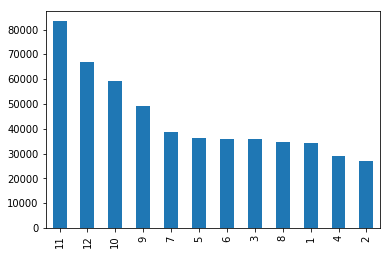

In [37]:
dataset.month.value_counts().plot(kind='bar')

Graph we can conclude that most of sales happended in the last quarter of year

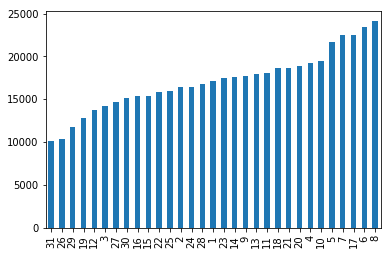

In [39]:
dataset.day.value_counts(ascending=True).plot(kind='bar')

In [40]:
#Top 5 items most sales
dataset.Description.value_counts()[:5]

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
Name: Description, dtype: int64

In [42]:
dataset.groupby(['Description']).describe().transpose()

Description          4 PURPLE FLOCK DINNER CANDLES  \
Quantity     count                       41.000000   
             mean                         3.512195   
             std                          3.834853   
             min                          1.000000   
             25%                          1.000000   
             50%                          2.000000   
             75%                          4.000000   
             max                         12.000000   
UnitPrice    count                       41.000000   
             mean                         2.455366   
             std                          0.825061   
             min                          0.790000   
             25%                          2.550000   
             50%                          2.550000   
             75%                          2.550000   
             max                          5.060000   
total_amount count                       41.000000   
             mean                         7.092683   
             std                          6.723367   
             min                          0.790000   
             25%                          2.550000   
             50%                          5.100000   
             75%                          9.480000   
             max                         30.600000   
month        count                       41.000000   
             mean                         8.902439   
             std                          3.382343   
             min                          1.000000   
             25%                          7.000000   
             50%                         11.000000   
             75%                         11.000000   
             max                         12.000000   
day          count                       41.000000   
             mean                        14.365854   
             std                          8.884695   
             min                          1.000000   
             25%                          7.000000   
             50%                         15.000000   
             75%                         20.000000   
             max                         30.000000   
year         count                       41.000000   
             mean                      2010.926829   
             std                          0.263652   
             min                       2010.000000   
             25%                       2011.000000   
             50%                       2011.000000   
             75%                       2011.000000   
             max                       2011.000000   
hour         count                       41.000000   
             mean                        12.829268   
             std                          1.842586   
             min                          9.000000   
             25%                         12.000000   
             50%                         13.000000   
             75%                         14.000000   
             max                         16.000000   

Description          50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
Quantity     count                      129.000000          179.000000   
             mean                        14.844961           13.715084   
             std                         35.162447           48.541102   
             min                          1.000000            1.000000   
             25%                          8.000000            1.000000   
             50%                         12.000000            3.000000   
             75%                         12.000000           12.000000   
             max                        400.000000          400.000000   
UnitPrice    count                      129.000000          179.000000   
             mean                         1.426589            1.502123   
             std                          0.431561            0.499449   
             min                 

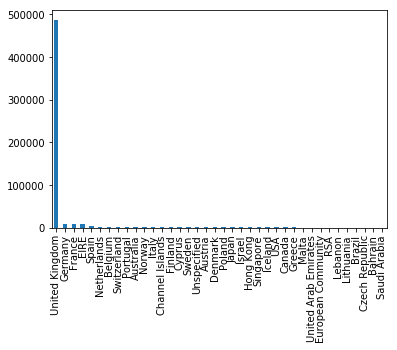

In [43]:
dataset.Country.value_counts().plot(kind='bar')

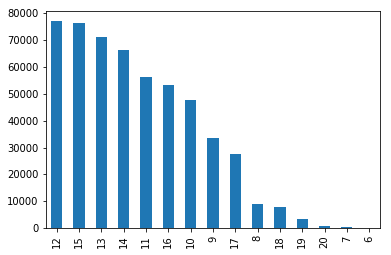

In [44]:
dataset['hour'].value_counts().plot(kind='bar')

In [51]:
dataset[dataset['month']==11].groupby(['Description']).sum().sort_values(by='total_amount',ascending=False)[:10]

,Quantity,UnitPrice,total_amount,month,day,year,hour
Description,,,,,,,
DOTCOM POSTAGE,47,36905.40,36905.40,517,830,94517,662
RABBIT NIGHT LIGHT,14954,1144.78,34556.72,5687,8089,1039687,6690
PAPER CHAIN KIT 50'S CHRISTMAS,7908,1309.74,28985.04,4466,6727,816466,5240
WHITE HANGING HEART T-LIGHT HOLDER,4944,884.06,14362.12,2959,4330,540959,3436
POPCORN HOLDER,12460,254.52,14195.60,2816,4306,514816,3281
REGENCY CAKESTAND 3 TIER,1054,3028.41,13799.58,2266,3308,414266,2629
PAPER CHAIN KIT VINTAGE CHRISTMAS,3827,954.38,12944.49,3102,4578,567102,3687
HOT WATER BOTTLE KEEP CALM,2362,1618.23,11824.42,3333,4901,609333,3870
JUMBO BAG RED RETROSPOT,5909,592.60,11641.37,2750,3967,502750,3188


5. Conclusion
